In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Membaca dataset
data = pd.read_csv('/content/dataset baru.csv', encoding='latin1', delimiter=';')


In [ ]:
# Ubah format tahun-kuartal menjadi format datetime
data['Date'] = pd.to_datetime(data['Date'].str.replace('/', '-'), format='%d-%m-%Y')

In [ ]:
# Cek daftar kolom
print(data.columns)

# Memilih variabel yang akan digunakan untuk memprediksi pendapatan perusahaan
X = data[['Debt-to-Equity', 'Current Ratio', 'Earnings per Share', 'Return On Capital Employed', 'Net Margin Profit', 'Inventory Turnover Ratio', 'Net Income', 'Assets', 'Liabilities', 'Equity']]
y = data['Revenue']

# Cetak hasil pemilihan kolom
print(X)
print(y)

Index(['Companies', 'Date', 'Revenue', 'Net Income', 'Assets',
       'non-current assets', 'Liabilities', 'Equity', 'Shares outstanding',
       'Debt-to-Equity', 'Current Ratio', 'Earnings per Share',
       'Return On Capital Employed', 'Net Margin Profit',
       'Inventory Turnover Ratio'],
      dtype='object')
      Debt-to-Equity  Current Ratio  Earnings per Share  \
0               0.00           2.01              545.63   
1               0.00           1.53              505.39   
2               0.00           1.19              349.81   
3               0.00           1.94              323.58   
4               0.00           1.72              143.65   
...              ...            ...                 ...   
1339            0.05           2.14              243.28   
1340            0.05           2.42              100.88   
1341            0.05           2.54               88.84   
1342            0.04           2.55              154.52   
1343            0.13           1

In [ ]:
# Pembagian dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membuat objek imputer untuk data fitur
imputer = SimpleImputer(strategy='mean')

In [ ]:
# Melakukan imputasi pada data latih dan data uji untuk fitur
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Membuat objek imputer untuk kolom target
target_imputer = SimpleImputer(strategy='mean')

In [ ]:
# Melakukan imputasi pada kolom target
y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1))

In [ ]:
# Konversi kembali ke Series
y_train_imputed = pd.Series(y_train_imputed.flatten(), index=y_train.index)

In [ ]:
# Fungsi untuk menghitung dan menyimpan lower bound dan upper bound
def calculate_bounds(df, columns):
    bounds = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        bounds[col] = (lower_bound, upper_bound)
    return bounds

# Fungsi untuk menghapus outliers berdasarkan bounds yang telah dihitung
def remove_outliers(df, bounds):
    for col, (lower_bound, upper_bound) in bounds.items():
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Pilih kolom yang ingin diperiksa untuk outliers
selected_columns = ['Revenue', 'Debt-to-Equity', 'Current Ratio', 'Earnings per Share', 'Return On Capital Employed', 'Net Margin Profit', 'Inventory Turnover Ratio', 'Net Income', 'Assets', 'Liabilities', 'Equity']

# Hitung bounds untuk kolom-kolom yang dipilih
bounds = calculate_bounds(data, selected_columns)

# Hapus outliers berdasarkan bounds yang telah dihitung
data_cleaned = remove_outliers(data, bounds)

print("Bounds:", bounds)
print("Cleaned Data:")
print(data_cleaned)

Bounds: {'Revenue': (-10024.125, 24422.875), 'Debt-to-Equity': (-0.81, 1.5100000000000002), 'Current Ratio': (-1.0237500000000002, 5.30625), 'Earnings per Share': (-280.23125, 499.09875), 'Return On Capital Employed': (-6.425000000000001, 15.715), 'Net Margin Profit': (-9.30625, 28.30375), 'Inventory Turnover Ratio': (-3.8199999999999994, 11.16), 'Net Income': (-1402.75, 2833.25), 'Assets': (-16532.0, 41360.0), 'Liabilities': (-19662.375, 42858.625), 'Equity': (-26993.75, 59824.25)}
Cleaned Data:
     Companies       Date  Revenue  Net Income  Assets  non-current assets  \
2         AALI 2008-07-01     2052         532    3283                4421   
4         AALI 2009-01-01     1408         218    2219                4820   
5         AALI 2009-04-01     2129         552    2382                5147   
6         AALI 2009-07-01     1925         478    2404                5437   
7         AALI 2009-10-01     1961         413    1714                5857   
...        ...        ...     

Top 5 Perusahaan dengan Debt-to-Equity Tertinggi:
1. BYAN (10.74)
2. ADRO (4.82)
3. BRPT (2.7)
4. CPIN (2.2)
5. AMRT (1.95)
6. INKP (1.88)
7. MYOR (1.36)
8. MASA (1.32)
9. HMSP (1.26)
10. UNVR (0.96)
11. UNTR (0.85)
12. ASII (0.83)
13. ANTM (0.78)
14. TPIA (0.7)
15. AALI (0.69)
16. GGRM (0.55)
17. AUTO (0.32)
18. INTP (0.22)
19. INCO (0.22)
20. KLBF (0.16)
21. ACES (0.12)


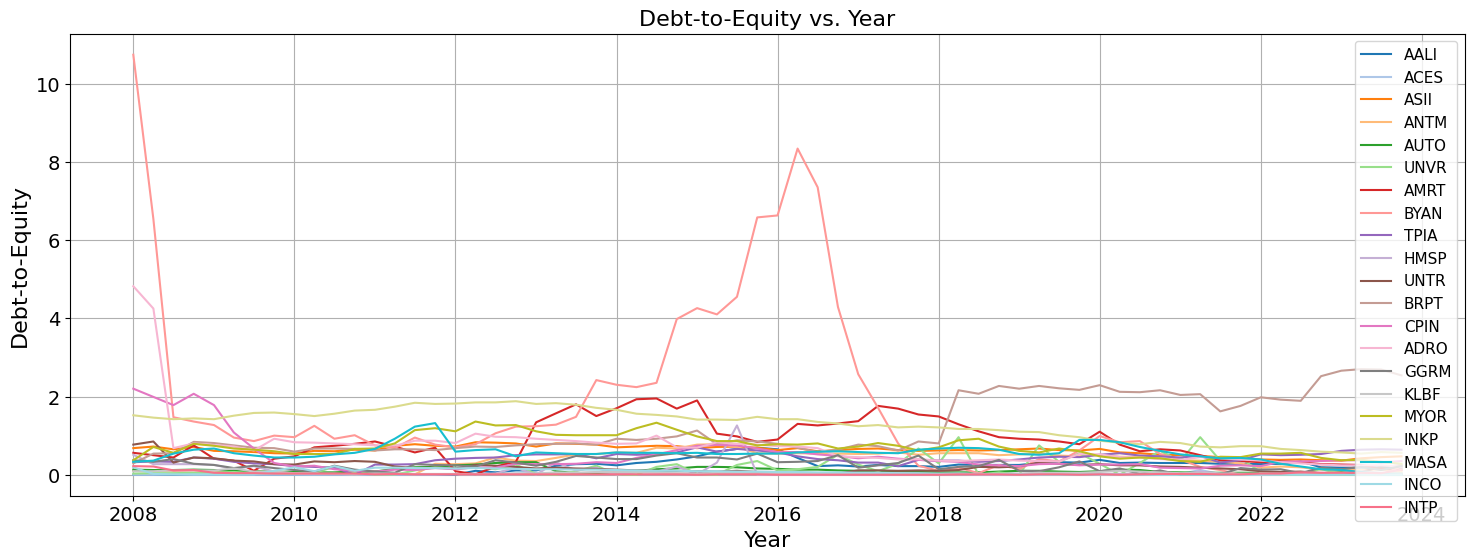

In [ ]:
# Mengurutkan data berdasarkan 'Debt-to-Equity' secara descending
sorted_data = data.sort_values(by='Debt-to-Equity', ascending=False)
# Memberi peringkat pada setiap perusahaan berdasarkan 'Debt-to-Equity'
sorted_data['Peringkat'] = sorted_data['Debt-to-Equity'].rank(ascending=False, method='dense')

# Filter 5 perusahaan DER tertinggi
unique_top_5_perusahaan = sorted_data.drop_duplicates(subset=['Companies']).head(21)
unique_top_5_perusahaan['Nomor Urut'] = range(1, 22)
top_5_perusahaan = unique_top_5_perusahaan['Companies'].tolist()
filtered_data = data[data['Companies'].isin(top_5_perusahaan)]
# Menampilkan top 5 perusahaan dengan Debt-to-Equity tertinggi
print("Top 5 Perusahaan dengan Debt-to-Equity Tertinggi:")
for index, row in unique_top_5_perusahaan.iterrows():
    print(f"{int(row['Nomor Urut'])}. {row['Companies']} ({row['Debt-to-Equity']})")

# Filter data untuk perusahaan-perusahaan tertentu
#selected_companies = ['AALI', 'ASII', 'UNVR']
#filtered_data = data_cleaned[data_cleaned['Perusahaan'].isin(selected_companies)]

# Membuat palet warna yang cukup untuk 21 perusahaan
custom_palette = sns.color_palette("tab20", 20) + sns.color_palette("husl", 1)

# Debt-to-Equity vs. Tahun
plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y='Debt-to-Equity', hue='Companies', data=data, palette=custom_palette)
plt.title('Debt-to-Equity vs. Year', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Debt-to-Equity', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=11)
plt.grid(True)
plt.show()

Top 5 Perusahaan dengan Earnings per Share Tertinggi:
1. TPIA (3167.58)
2. BYAN (3102.82)
3. GGRM (1890.47)
4. UNTR (1618.12)
5. ASII (1198.76)
6. HMSP (746.22)
7. INKP (726.66)
8. AALI (565.49)
9. UNVR (494.58)
10. AUTO (437.25)
11. INTP (422.3)
12. MYOR (404.12)
13. ADRO (384.64)
14. ANTM (247.98)
15. CPIN (212.88)
16. INCO (147.95)
17. BRPT (93.42)
18. ACES (57.2)
19. AMRT (50.52)
20. MASA (46.5)
21. KLBF (42.86)


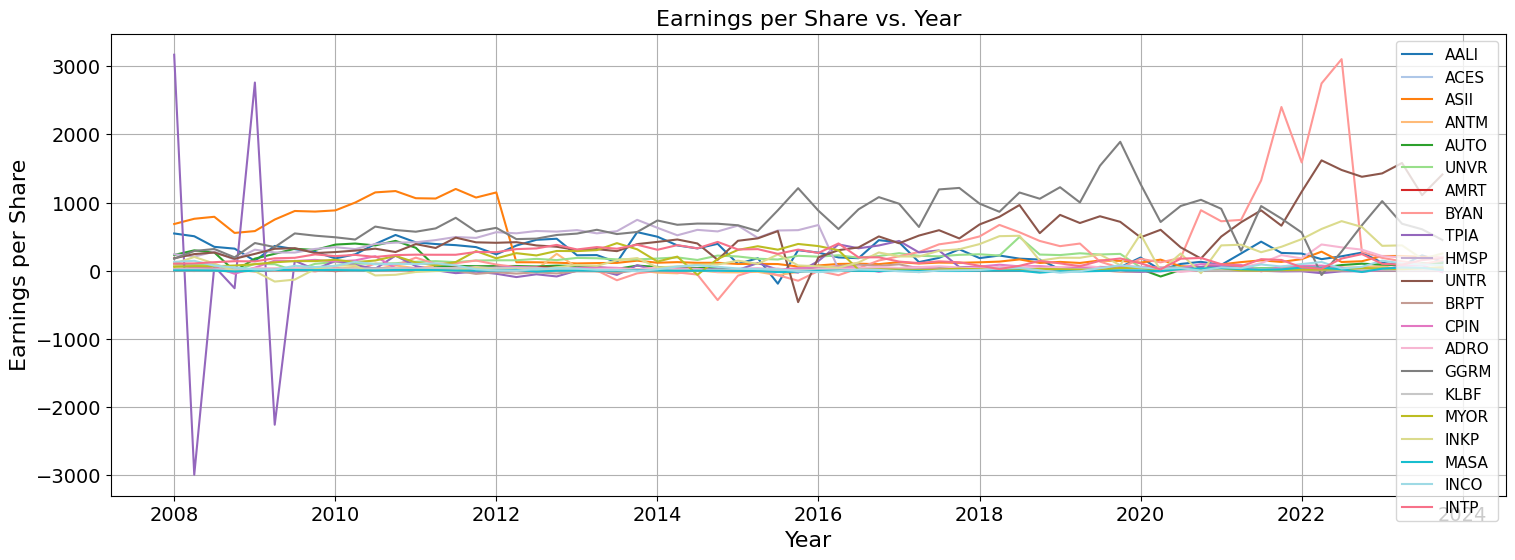

In [ ]:
# Mengurutkan data berdasarkan 'Earnings per Share' secara descending
sorted_data = data.sort_values(by='Earnings per Share', ascending=False)
# Memberi peringkat pada setiap perusahaan berdasarkan 'Earnings per Share'
sorted_data['Peringkat'] = sorted_data['Earnings per Share'].rank(ascending=False, method='dense')

# Filter 5 perusahaan DER tertinggi
unique_top_5_perusahaan = sorted_data.drop_duplicates(subset=['Companies']).head(21)
unique_top_5_perusahaan['Nomor Urut'] = range(1, 22)
top_5_perusahaan = unique_top_5_perusahaan['Companies'].tolist()
filtered_data = data[data['Companies'].isin(top_5_perusahaan)]
# Menampilkan top 5 perusahaan dengan Earnings per Share tertinggi
print("Top 5 Perusahaan dengan Earnings per Share Tertinggi:")
for index, row in unique_top_5_perusahaan.iterrows():
    print(f"{int(row['Nomor Urut'])}. {row['Companies']} ({row['Earnings per Share']})")

# Filter data untuk perusahaan-perusahaan tertentu
#selected_companies = ['AALI', 'ASII', 'UNVR']
#filtered_data = data_cleaned[data_cleaned['Perusahaan'].isin(selected_companies)]

# Membuat palet warna yang cukup untuk 21 perusahaan
custom_palette = sns.color_palette("tab20", 20) + sns.color_palette("husl", 1)

# Earnings per Share vs. Tahun
plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y='Earnings per Share', hue='Companies', data=data, palette=custom_palette)
plt.title('Earnings per Share vs. Year', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Earnings per Share', fontsize=16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=11)
plt.grid(True)
plt.show()

Top 5 Perusahaan dengan Net Margin Profit Tertinggi:
1. TPIA (183.1)
2. BYAN (89.44)
3. ANTM (71.29)
4. BRPT (67.08)
5. ADRO (39.69)
6. INCO (39.21)
7. INTP (38.58)
8. AALI (36.32)
9. UNVR (35.61)
10. MASA (34.94)
11. UNTR (24.97)
12. AUTO (24.71)
13. INKP (23.69)
14. CPIN (21.53)
15. ACES (20.6)
16. ASII (20.33)
17. MYOR (17.66)
18. HMSP (16.06)
19. KLBF (14.58)
20. GGRM (14.09)
21. AMRT (4.57)


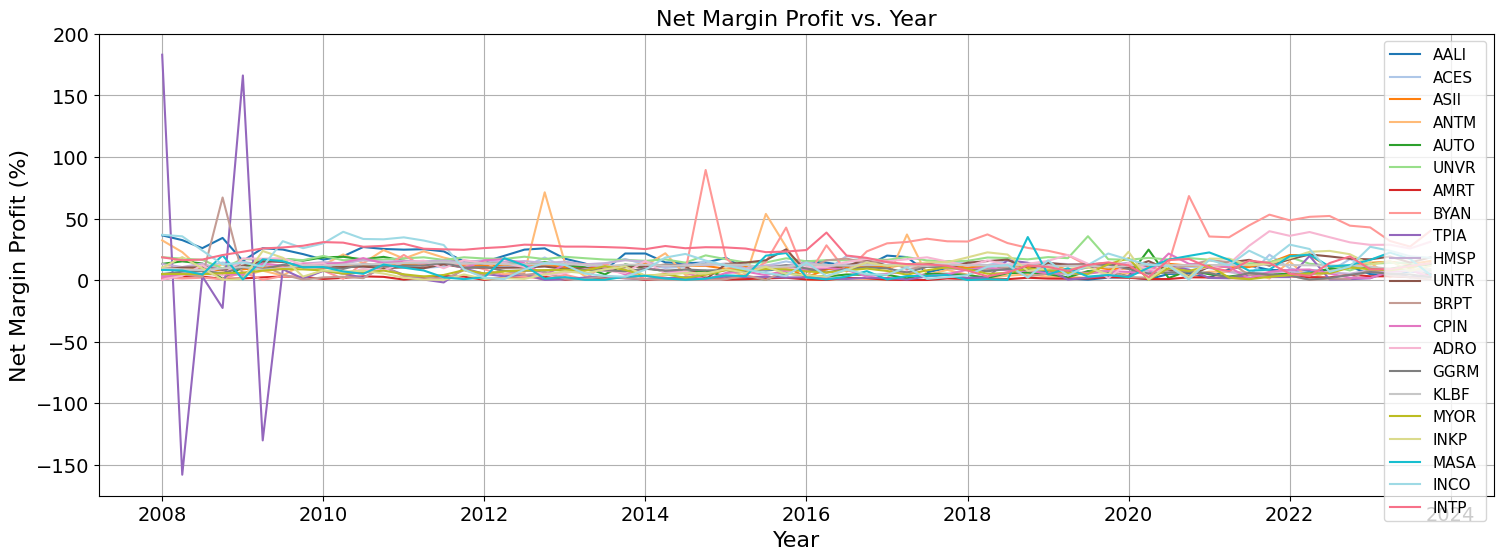

In [ ]:
# Mengurutkan data berdasarkan 'Net Margin Profit' secara descending
sorted_data = data.sort_values(by='Net Margin Profit', ascending=False)
# Memberi peringkat pada setiap perusahaan berdasarkan 'Net Margin Profit'
sorted_data['Peringkat'] = sorted_data['Net Margin Profit'].rank(ascending=False, method='dense')

# Filter 5 perusahaan DER tertinggi
unique_top_5_perusahaan = sorted_data.drop_duplicates(subset=['Companies']).head(21)
unique_top_5_perusahaan['Nomor Urut'] = range(1, 22)
top_5_perusahaan = unique_top_5_perusahaan['Companies'].tolist()
filtered_data = data[data['Companies'].isin(top_5_perusahaan)]
# Menampilkan top 5 perusahaan dengan Net Margin Profit tertinggi
print("Top 5 Perusahaan dengan Net Margin Profit Tertinggi:")
for index, row in unique_top_5_perusahaan.iterrows():
    print(f"{int(row['Nomor Urut'])}. {row['Companies']} ({row['Net Margin Profit']})")

# Filter data untuk perusahaan-perusahaan tertentu
#selected_companies = ['AALI', 'ASII', 'UNVR']
#filtered_data = data_cleaned[data_cleaned['Perusahaan'].isin(selected_companies)]

# Membuat palet warna yang cukup untuk 21 perusahaan
custom_palette = sns.color_palette("tab20", 20) + sns.color_palette("husl", 1)

# Net Margin Profit vs. Tahun
plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y='Net Margin Profit', hue='Companies', data=data, palette=custom_palette)
plt.title('Net Margin Profit vs. Year', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Net Margin Profit (%)', fontsize=16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=11)
plt.grid(True)
plt.show()

## mencari nilai K optimal



In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# ... (rest of your imports and data loading)

def find_optimal_k_for_feature_combinations(data, all_features):
  results = {}

  for r in range(1, len(all_features) + 1):
    for combo in combinations(all_features, r):
      combo_features = list(combo)
      key = ', '.join(combo_features)

      X = data[combo_features]
      y = data[target]
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

      best_k, best_r2 = None, -float('inf')
      for k in range(1, 26):
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2:
          best_k, best_r2 = k, r2

      results[key] = {'optimal_k': best_k, 'max_r2': best_r2}

  return results

# Call function to find optimal K for each feature combination
optimal_k_results = find_optimal_k_for_feature_combinations(data, all_features)

# Print the results
for combo, result in optimal_k_results.items():
  optimal_k = result['optimal_k']
  max_r2 = result['max_r2']
  print(f"Features: {combo}")
  print(f"Optimal K = {optimal_k}, Maximum R-squared = {max_r2:.5f}\n")


Features: Equity
Optimal K = 18, Maximum R-squared = 0.69649

Features: Assets
Optimal K = 12, Maximum R-squared = 0.83656

Features: Liabilities
Optimal K = 22, Maximum R-squared = 0.78864

Features: Net Income
Optimal K = 24, Maximum R-squared = 0.67946

Features: Equity, Assets
Optimal K = 5, Maximum R-squared = 0.89790

Features: Equity, Liabilities
Optimal K = 7, Maximum R-squared = 0.85594

Features: Equity, Net Income
Optimal K = 2, Maximum R-squared = 0.77642

Features: Assets, Liabilities
Optimal K = 7, Maximum R-squared = 0.90010

Features: Assets, Net Income
Optimal K = 9, Maximum R-squared = 0.87581

Features: Liabilities, Net Income
Optimal K = 6, Maximum R-squared = 0.87570

Features: Equity, Assets, Liabilities
Optimal K = 2, Maximum R-squared = 0.94531

Features: Equity, Assets, Net Income
Optimal K = 7, Maximum R-squared = 0.91376

Features: Equity, Liabilities, Net Income
Optimal K = 5, Maximum R-squared = 0.88393

Features: Assets, Liabilities, Net Income
Optimal K =

In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Membaca dataset
data = pd.read_csv('/content/dataset baru.csv', encoding='latin1', delimiter=';')

# List of features
all_features = ['Equity', 'Assets', 'Liabilities']  # Ganti dengan semua fitur yang tersedia dalam dataset Anda
target = 'Revenue'

# Function to prepare data and calculate KNN performance
def calculate_knn_performance(data, features, target, k):
    X = data[features]
    y = data[target]

    # Split dataset into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize KNN model
    knn = KNeighborsRegressor(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Predict on test set
    y_pred = knn.predict(X_test)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)

    return r2

# Function to find optimal K for each feature combination
def find_optimal_k_for_feature_combinations(data, all_features):
    results = {}

    # Loop through all possible feature combinations
    for r in range(1, len(all_features) + 1):
        for combo in combinations(all_features, r):
            combo_features = list(combo)
            key = ', '.join(combo_features)
            results[key] = {}

            # Test different values of K
            for k in range(1, 26):
                r2 = calculate_knn_performance(data, combo_features, target, k)
                results[key][k] = r2

    return results

# Call function to find optimal K for each feature combination
optimal_k_results = find_optimal_k_for_feature_combinations(data, all_features)

# Print the results
for combo, k_results in optimal_k_results.items():
    print(f"Features: {combo}")
    for k, r2 in k_results.items():
        print(f"K = {k}: R-squared = {r2:.5f}")
    print()

# Function to find optimal K and R-squared for each feature combination
def find_optimal_k_for_feature_combinations(data, all_features):
    results = {}

    # Loop through all possible feature combinations
    for r in range(1, len(all_features) + 1):
        for combo in combinations(all_features, r):
            combo_features = list(combo)
            key = ', '.join(combo_features)
            results[key] = {'optimal_k': None, 'max_r2': -float('inf')}

            # Test different values of K
            for k in range(1, 26):
                r2 = calculate_knn_performance(data, combo_features, target, k)
                if r2 > results[key]['max_r2']:
                    results[key]['max_r2'] = r2
                    results[key]['optimal_k'] = k

    return results

# Call function to find optimal K for each feature combination
optimal_k_results = find_optimal_k_for_feature_combinations(data, all_features)

# Print the results
for combo, result in optimal_k_results.items():
    optimal_k = result['optimal_k']
    max_r2 = result['max_r2']
    print(f"Features: {combo}")
    print(f"Optimal K = {optimal_k}, Maximum R-squared = {max_r2:.5f}\n")


Features: Equity
K = 1: R-squared = 0.38976
K = 2: R-squared = 0.57539
K = 3: R-squared = 0.60373
K = 4: R-squared = 0.61750
K = 5: R-squared = 0.63142
K = 6: R-squared = 0.66124
K = 7: R-squared = 0.67913
K = 8: R-squared = 0.68586
K = 9: R-squared = 0.67791
K = 10: R-squared = 0.67916
K = 11: R-squared = 0.67183
K = 12: R-squared = 0.67521
K = 13: R-squared = 0.67751
K = 14: R-squared = 0.68325
K = 15: R-squared = 0.68515
K = 16: R-squared = 0.68840
K = 17: R-squared = 0.68994
K = 18: R-squared = 0.69649
K = 19: R-squared = 0.69194
K = 20: R-squared = 0.68960
K = 21: R-squared = 0.69013
K = 22: R-squared = 0.69137
K = 23: R-squared = 0.68943
K = 24: R-squared = 0.69018
K = 25: R-squared = 0.68820

Features: Assets
K = 1: R-squared = 0.69424
K = 2: R-squared = 0.74579
K = 3: R-squared = 0.79174
K = 4: R-squared = 0.80412
K = 5: R-squared = 0.80170
K = 6: R-squared = 0.81545
K = 7: R-squared = 0.82801
K = 8: R-squared = 0.83346
K = 9: R-squared = 0.83293
K = 10: R-squared = 0.83368
K =

## 1 prediktor

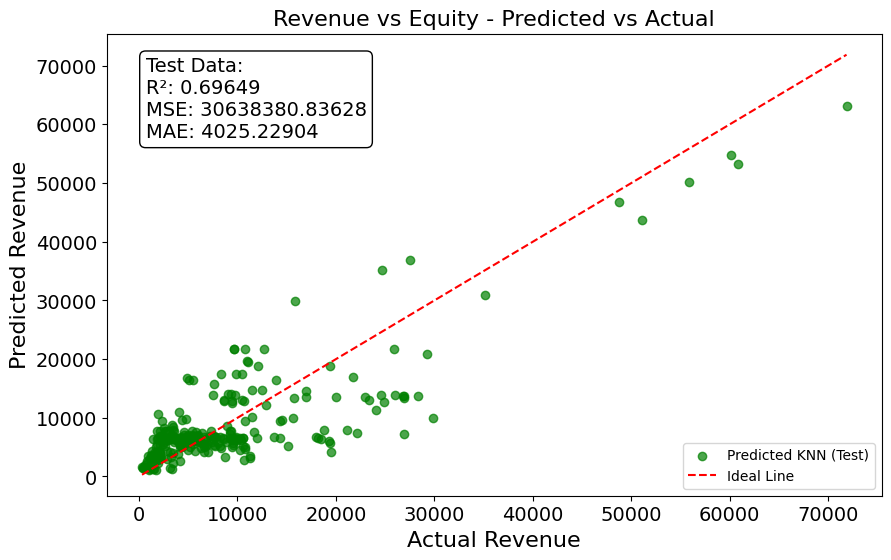

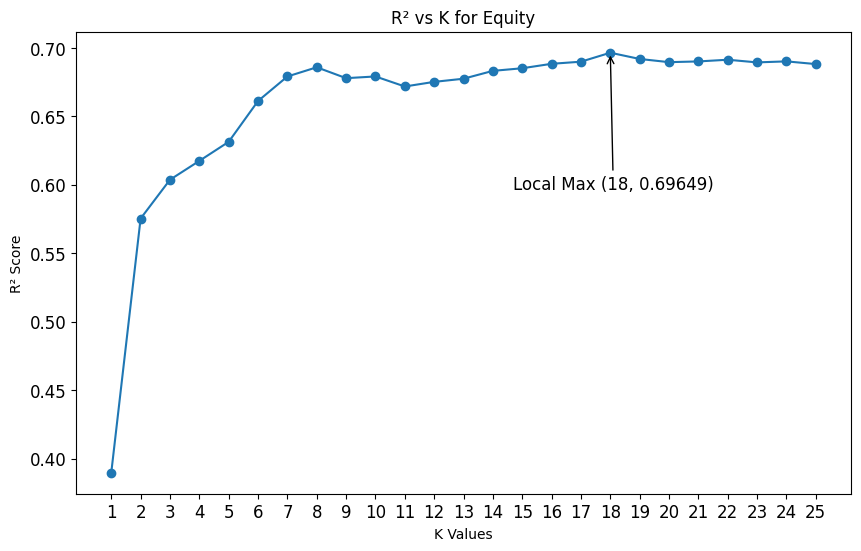

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

target = 'Revenue'
feature = 'Equity'

# Function to prepare data and calculate KNN performance
def calculate_knn_performance(data, feature, target, k):
    X = data[[feature]]
    y = data[target]

    # Split dataset into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize KNN model
    knn = KNeighborsRegressor(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Predict on test set
    y_pred = knn.predict(X_test)

    # Predict on training set for scatter plot
    y_pred_train = knn.predict(X_train)

    # Calculate evaluation metrics for test data
    r2_test = r2_score(y_test, y_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    mae_test = mean_absolute_error(y_test, y_pred)

    # Calculate evaluation metrics for train data
    r2_train = r2_score(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)

    return X_train, y_train, X_test, y_test, y_pred_train, y_pred, r2_train, mse_train, mae_train, r2_test, mse_test, mae_test

# Function to plot Predicted vs Actual with evaluation metrics for both train and test data
def plot_predicted_vs_actual(X_train, y_train, X_test, y_test, y_pred_train, y_pred, title, r2_train, mse_train, mae_train, r2_test, mse_test, mae_test):
    # Plot for test data
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='green', alpha=0.7, label='Predicted KNN (Test)')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line')
    plt.xlabel('Actual Revenue', fontsize=16)
    plt.ylabel('Predicted Revenue', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(loc='lower right')

    # Add evaluation metrics description for test data
    plt.text(0.05, 0.95, f'Test Data:\nR²: {r2_test:.5f}\nMSE: {mse_test:.5f}\nMAE: {mae_test:.5f}',
             transform=plt.gca().transAxes, fontsize=14, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
    plt.show()

# Function to plot R-squared vs K
def plot_r2_vs_k(data, feature, target):
    X = data[[feature]]
    y = data[target]

    # Split dataset into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    k_values = range(1, 26)
    r2_values = []

    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_values.append(r2)

    # Find local maxima
    max_r2 = max(r2_values)
    max_index = r2_values.index(max_r2)
    optimal_k = k_values[max_index]

    # Plot R-squared vs K
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, r2_values, marker='o', linestyle='-')
    plt.title(f'R² vs K for {feature}')
    plt.xlabel('K Values')
    plt.ylabel('R² Score')
    plt.xticks(np.arange(1, 26, step=1), fontsize=12)
    plt.yticks(fontsize=12)

     # Annotate the local maximum
    plt.annotate(f'Local Max ({optimal_k}, {max_r2:.5f})', xy=(optimal_k, max_r2), xytext=(optimal_k + 0.1, max_r2 - 0.1),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=12, ha='center')

    plt.show()

# Call function to calculate KNN performance for Equity
X_train_eq, y_train_eq, X_test_eq, y_test_eq, y_pred_train_eq, y_pred_eq, r2_train_eq, mse_train_eq, mae_train_eq, r2_test_eq, mse_test_eq, mae_test_eq = calculate_knn_performance(data, feature, target, 18)

# Plot Predicted vs Actual for Equity
plot_predicted_vs_actual(X_train_eq, y_train_eq, X_test_eq, y_test_eq, y_pred_train_eq, y_pred_eq,
                         f'Revenue vs Equity - Predicted vs Actual', r2_train_eq, mse_train_eq, mae_train_eq,
                         r2_test_eq, mse_test_eq, mae_test_eq)

# Plot R-squared vs K for Equity
plot_r2_vs_k(data, feature, target)


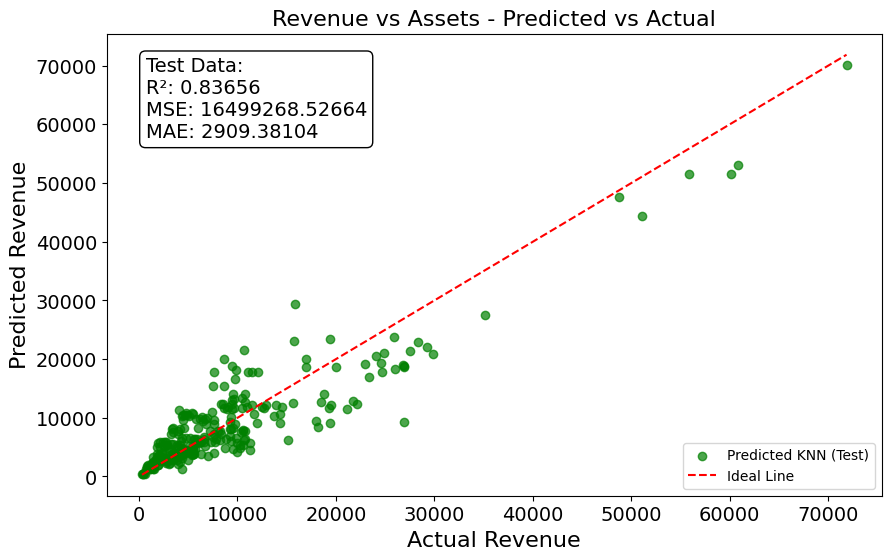

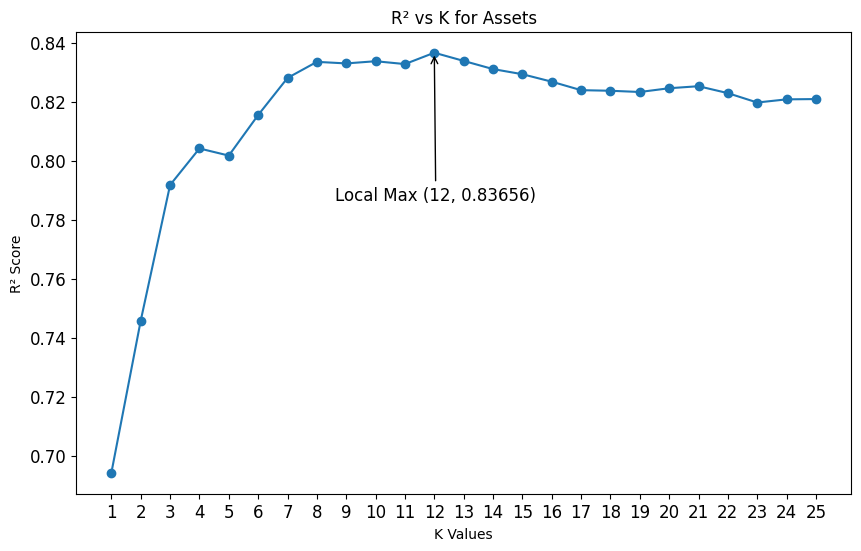

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

target = 'Revenue'
feature = 'Assets'

# Function to prepare data and calculate KNN performance
def calculate_knn_performance(data, feature, target, k):
    X = data[[feature]]
    y = data[target]

    # Split dataset into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize KNN model
    knn = KNeighborsRegressor(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Predict on test set
    y_pred = knn.predict(X_test)

    # Predict on training set for scatter plot
    y_pred_train = knn.predict(X_train)

    # Calculate evaluation metrics for test data
    r2_test = r2_score(y_test, y_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    mae_test = mean_absolute_error(y_test, y_pred)

    # Calculate evaluation metrics for train data
    r2_train = r2_score(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)

    return X_train, y_train, X_test, y_test, y_pred_train, y_pred, r2_train, mse_train, mae_train, r2_test, mse_test, mae_test

# Function to plot Predicted vs Actual with evaluation metrics for both train and test data
def plot_predicted_vs_actual(X_train, y_train, X_test, y_test, y_pred_train, y_pred, title, r2_train, mse_train, mae_train, r2_test, mse_test, mae_test):
    # Plot for test data
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='green', alpha=0.7, label='Predicted KNN (Test)')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line')
    plt.xlabel('Actual Revenue', fontsize=16)
    plt.ylabel('Predicted Revenue', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(loc='lower right')

    # Add evaluation metrics description for test data
    plt.text(0.05, 0.95, f'Test Data:\nR²: {r2_test:.5f}\nMSE: {mse_test:.5f}\nMAE: {mae_test:.5f}',
             transform=plt.gca().transAxes, fontsize=14, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
    plt.show()

# Function to plot R-squared vs K
def plot_r2_vs_k(data, feature, target):
    X = data[[feature]]
    y = data[target]

    # Split dataset into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    k_values = range(1, 26)
    r2_values = []

    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_values.append(r2)

    # Find local maxima
    max_r2 = max(r2_values)
    max_index = r2_values.index(max_r2)
    optimal_k = k_values[max_index]

    # Plot R-squared vs K
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, r2_values, marker='o', linestyle='-')
    plt.title(f'R² vs K for {feature}')
    plt.xlabel('K Values')
    plt.ylabel('R² Score')
    plt.xticks(np.arange(1, 26, step=1), fontsize=12)
    plt.yticks(fontsize=12)

    # Annotate the local maximum
    plt.annotate(f'Local Max ({optimal_k}, {max_r2:.5f})', xy=(optimal_k, max_r2), xytext=(optimal_k + 0.05, max_r2 - 0.05),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=12, ha='center')

    plt.show()

# Call function to calculate KNN performance for Assets
X_train_assets, y_train_assets, X_test_assets, y_test_assets, y_pred_train_assets, y_pred_assets, r2_train_assets, mse_train_assets, mae_train_assets, r2_test_assets, mse_test_assets, mae_test_assets = calculate_knn_performance(data, feature, target, 12)

# Plot Predicted vs Actual for Assets
plot_predicted_vs_actual(X_train_assets, y_train_assets, X_test_assets, y_test_assets, y_pred_train_assets, y_pred_assets,
                         f'Revenue vs Assets - Predicted vs Actual', r2_train_assets, mse_train_assets, mae_train_assets,
                         r2_test_assets, mse_test_assets, mae_test_assets)

# Plot R-squared vs K for Assets
plot_r2_vs_k(data, feature, target)


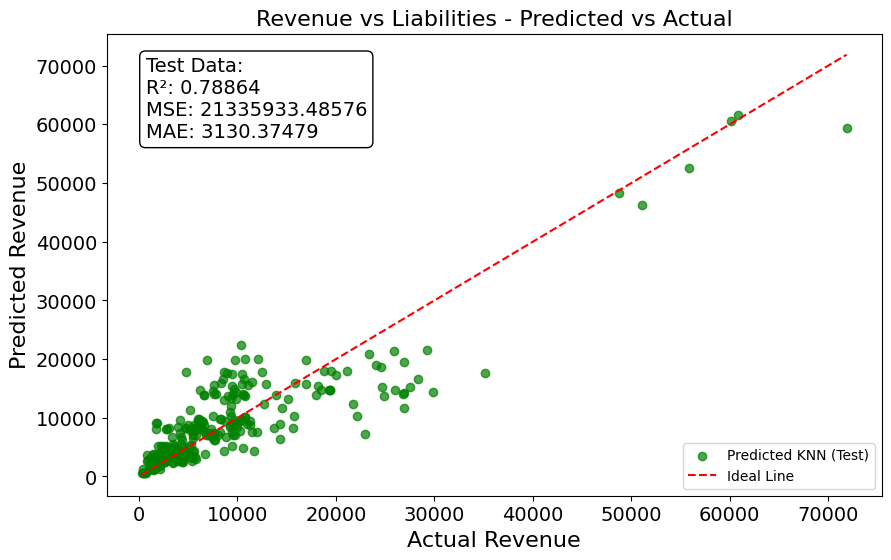

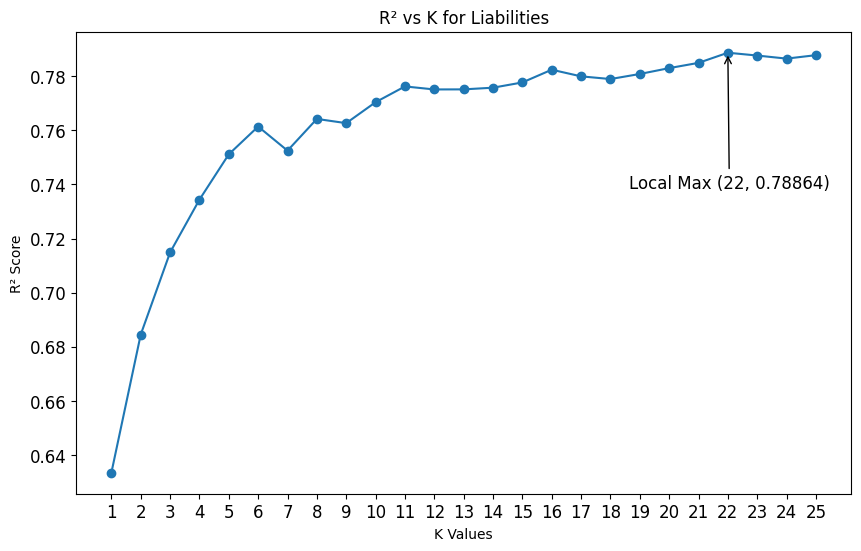

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

target = 'Revenue'
feature = 'Liabilities'

# Function to prepare data and calculate KNN performance
def calculate_knn_performance(data, feature, target, k):
    X = data[[feature]]
    y = data[target]

    # Split dataset into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize KNN model
    knn = KNeighborsRegressor(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Predict on test set
    y_pred = knn.predict(X_test)

    # Predict on training set for scatter plot
    y_pred_train = knn.predict(X_train)

    # Calculate evaluation metrics for test data
    r2_test = r2_score(y_test, y_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    mae_test = mean_absolute_error(y_test, y_pred)

    # Calculate evaluation metrics for train data
    r2_train = r2_score(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)

    return X_train, y_train, X_test, y_test, y_pred_train, y_pred, r2_train, mse_train, mae_train, r2_test, mse_test, mae_test

# Function to plot Predicted vs Actual with evaluation metrics for both train and test data
def plot_predicted_vs_actual(X_train, y_train, X_test, y_test, y_pred_train, y_pred, title, r2_train, mse_train, mae_train, r2_test, mse_test, mae_test):
    # Plot for test data
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='green', alpha=0.7, label='Predicted KNN (Test)')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line')
    plt.xlabel('Actual Revenue', fontsize=16)
    plt.ylabel('Predicted Revenue', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(loc='lower right')

    # Add evaluation metrics description for test data
    plt.text(0.05, 0.95, f'Test Data:\nR²: {r2_test:.5f}\nMSE: {mse_test:.5f}\nMAE: {mae_test:.5f}',
             transform=plt.gca().transAxes, fontsize=14, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
    plt.show()

# Function to plot R-squared vs K
def plot_r2_vs_k(data, feature, target):
    X = data[[feature]]
    y = data[target]

    # Split dataset into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    k_values = range(1, 26)
    r2_values = []

    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_values.append(r2)

    # Find local maxima
    max_r2 = max(r2_values)
    max_index = r2_values.index(max_r2)
    optimal_k = k_values[max_index]

    # Plot R-squared vs K
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, r2_values, marker='o', linestyle='-')
    plt.title(f'R² vs K for {feature}')
    plt.xlabel('K Values')
    plt.ylabel('R² Score')
    plt.xticks(np.arange(1, 26, step=1), fontsize=12)
    plt.yticks(fontsize=12)

    # Annotate the local maximum
    plt.annotate(f'Local Max ({optimal_k}, {max_r2:.5f})', xy=(optimal_k, max_r2), xytext=(optimal_k + 0.05, max_r2 - 0.05),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=12, ha='center')

    plt.show()

# Call function to calculate KNN performance for Liabilities
X_train_Liabilities, y_train_Liabilities, X_test_Liabilities, y_test_Liabilities, y_pred_train_Liabilities, y_pred_Liabilities, r2_train_Liabilities, mse_train_Liabilities, mae_train_Liabilities, r2_test_Liabilities, mse_test_Liabilities, mae_test_Liabilities = calculate_knn_performance(data, feature, target, 22)

# Plot Predicted vs Actual for Liabilities
plot_predicted_vs_actual(X_train_Liabilities, y_train_Liabilities, X_test_Liabilities, y_test_Liabilities, y_pred_train_Liabilities, y_pred_Liabilities,
                         f'Revenue vs Liabilities - Predicted vs Actual', r2_train_Liabilities, mse_train_Liabilities, mae_train_Liabilities,
                         r2_test_Liabilities, mse_test_Liabilities, mae_test_Liabilities)

# Plot R-squared vs K for Liabilities
plot_r2_vs_k(data, feature, target)


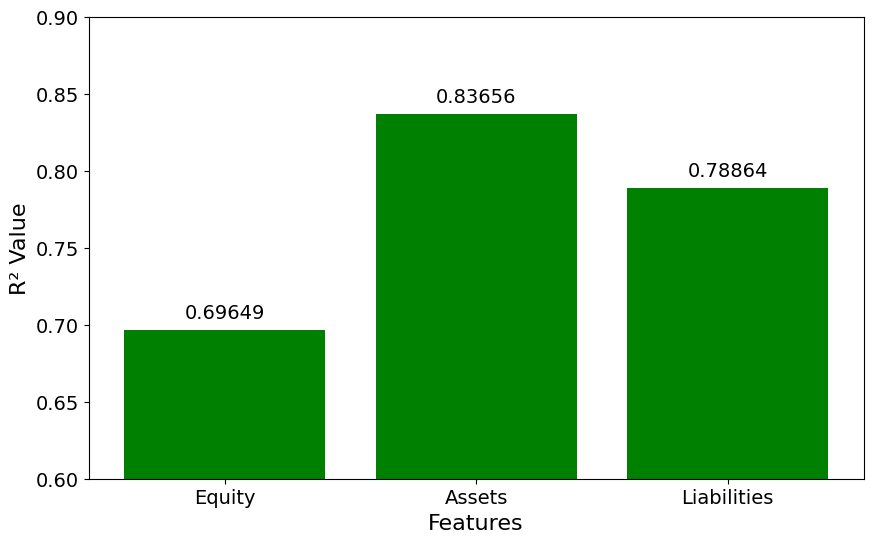

In [ ]:
import matplotlib.pyplot as plt

# Data R-squared (data test) dari masing-masing fitur
features = ['Equity', 'Assets', 'Liabilities']
r2_values = [0.69649, 0.83656, 0.78864]

# Plotting bar chart
plt.figure(figsize=(10, 6))
bar = plt.bar(features, r2_values, color='green')
plt.xlabel('Features', fontsize=16)
plt.ylabel('R² Value', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0.6, 0.9)  # Set y-axis limits
# Adding text labels above each bar
for bar, r2_value in zip(bar, r2_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{r2_value:.5f}', ha='center', va='bottom', fontsize=14)
plt.show()


## 2 prediktor

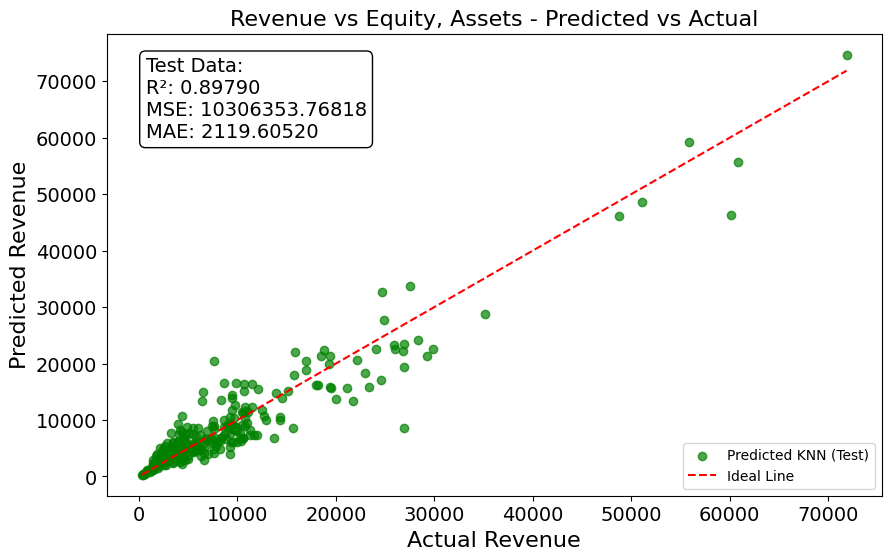

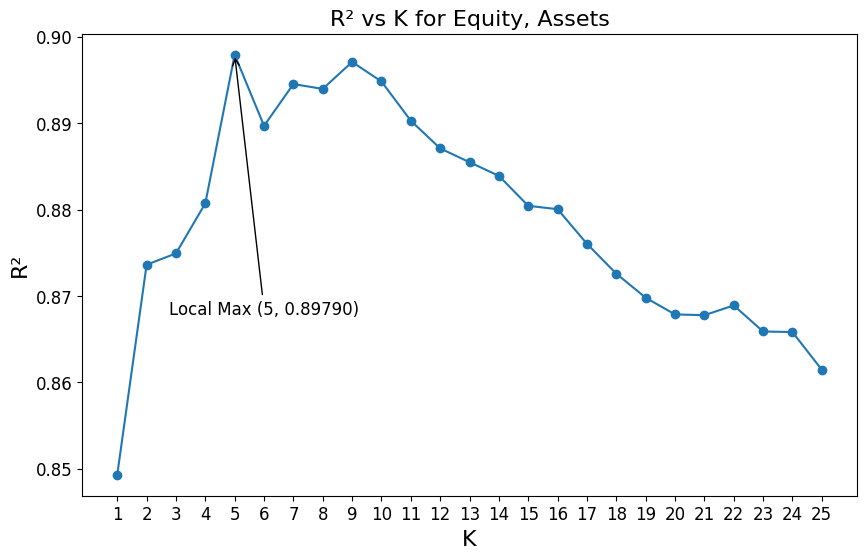

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

target = 'Revenue'
features = ['Equity', 'Assets']

# Function to prepare data and calculate KNN performance
def calculate_knn_performance(data, features, target, k):
    X = data[features]
    y = data[target]

    # Split dataset into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize KNN model
    knn = KNeighborsRegressor(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Predict on test set
    y_pred = knn.predict(X_test)

    # Predict on training set for scatter plot
    y_pred_train = knn.predict(X_train)

    # Calculate evaluation metrics for test data
    r2_test = r2_score(y_test, y_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    mae_test = mean_absolute_error(y_test, y_pred)

    # Calculate evaluation metrics for train data
    r2_train = r2_score(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)

    return X_train, y_train, X_test, y_test, y_pred_train, y_pred, r2_train, mse_train, mae_train, r2_test, mse_test, mae_test

# Function to plot Predicted vs Actual with evaluation metrics for both train and test data
def plot_predicted_vs_actual(X_train, y_train, X_test, y_test, y_pred_train, y_pred, title, r2_train, mse_train, mae_train, r2_test, mse_test, mae_test):
    # Plot for test data
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='green', alpha=0.7, label='Predicted KNN (Test)')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line')
    plt.xlabel('Actual Revenue', fontsize=16)
    plt.ylabel('Predicted Revenue', fontsize=16)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='lower right')

    # Add evaluation metrics description for test data
    plt.text(0.05, 0.95, f'Test Data:\nR²: {r2_test:.5f}\nMSE: {mse_test:.5f}\nMAE: {mae_test:.5f}',
             transform=plt.gca().transAxes, fontsize=14, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
    plt.show()

# Function to plot R-squared vs K
def plot_r2_vs_k(data, features, target):
    X = data[features]
    y = data[target]

    # Split dataset into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    k_values = range(1, 26)
    r2_values = []

    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_values.append(r2)

    # Find local maxima
    max_r2 = max(r2_values)
    max_index = r2_values.index(max_r2)
    optimal_k = k_values[max_index]

    # Plot R-squared vs K
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, r2_values, marker='o', linestyle='-')
    plt.title(f'R² vs K for {", ".join(features)}', fontsize=16)
    plt.xlabel('K', fontsize=16)
    plt.ylabel('R²', fontsize=16)
    plt.xticks(np.arange(1, 26, step=1), fontsize=12)
    plt.yticks(fontsize=12)

    plt.annotate(f'Local Max ({optimal_k}, {max_r2:.5f})', xy=(optimal_k, max_r2), xytext=(optimal_k + 1, max_r2 - 0.03),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, ha='center')

    plt.show()

# Call function to calculate KNN performance for Equity and Assets
X_train_EA, y_train_EA, X_test_EA, y_test_EA, y_pred_train_EA, y_pred_EA, r2_train_EA, mse_train_EA, mae_train_EA, r2_test_EA, mse_test_EA, mae_test_EA = calculate_knn_performance(data, features, target, 5)

# Plot Predicted vs Actual for Equity and Assets
plot_predicted_vs_actual(X_train_EA, y_train_EA, X_test_EA, y_test_EA, y_pred_train_EA, y_pred_EA,
                         f'Revenue vs Equity, Assets - Predicted vs Actual', r2_train_EA, mse_train_EA, mae_train_EA,
                         r2_test_EA, mse_test_EA, mae_test_EA)

# Plot R-squared vs K for Equity and Assets
plot_r2_vs_k(data, features, target)

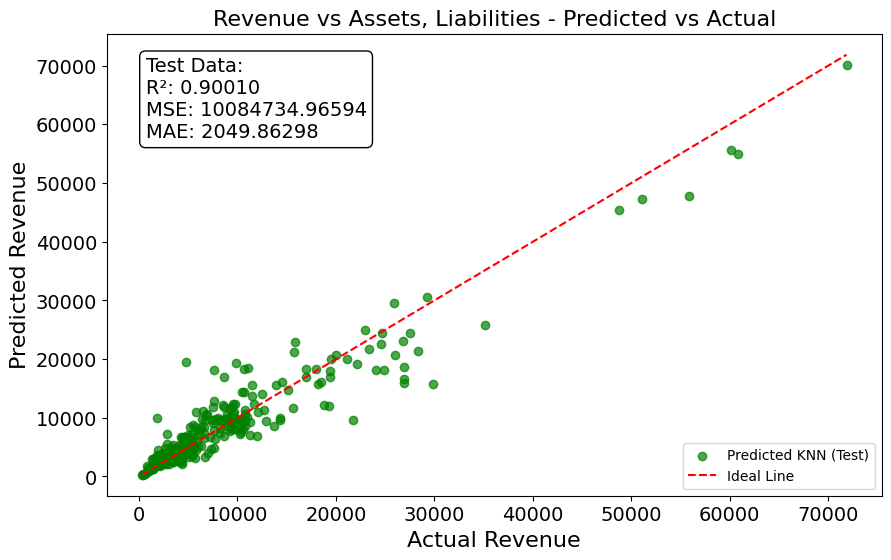

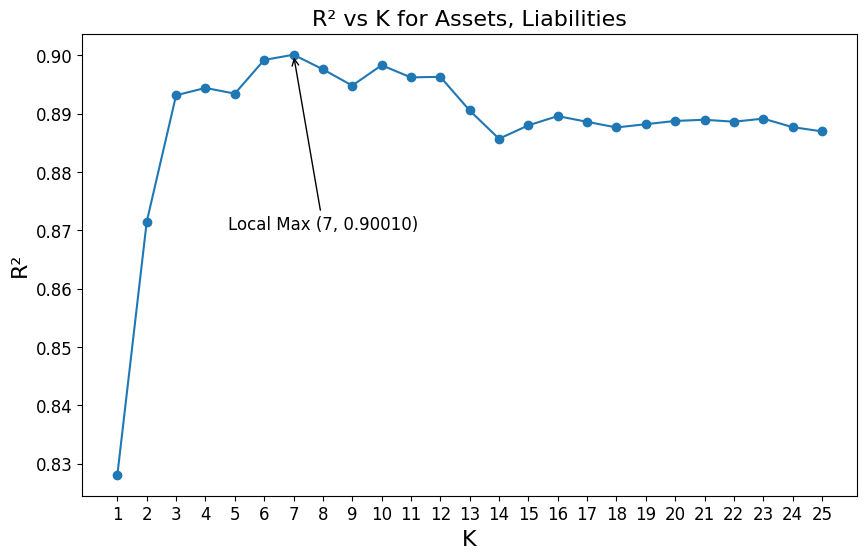

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

target = 'Revenue'
features = ['Assets', 'Liabilities']

# Function to prepare data and calculate KNN performance
def calculate_knn_performance(data, features, target, k):
    X = data[features]
    y = data[target]

    # Split dataset into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize KNN model
    knn = KNeighborsRegressor(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Predict on test set
    y_pred = knn.predict(X_test)

    # Predict on training set for scatter plot
    y_pred_train = knn.predict(X_train)

    # Calculate evaluation metrics for test data
    r2_test = r2_score(y_test, y_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    mae_test = mean_absolute_error(y_test, y_pred)

    # Calculate evaluation metrics for train data
    r2_train = r2_score(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)

    return X_train, y_train, X_test, y_test, y_pred_train, y_pred, r2_train, mse_train, mae_train, r2_test, mse_test, mae_test

# Function to plot Predicted vs Actual with evaluation metrics for both train and test data
def plot_predicted_vs_actual(X_train, y_train, X_test, y_test, y_pred_train, y_pred, title, r2_train, mse_train, mae_train, r2_test, mse_test, mae_test):
    # Plot for test data
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='green', alpha=0.7, label='Predicted KNN (Test)')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line')
    plt.xlabel('Actual Revenue', fontsize=16)
    plt.ylabel('Predicted Revenue', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(loc='lower right')

    # Add evaluation metrics description for test data
    plt.text(0.05, 0.95, f'Test Data:\nR²: {r2_test:.5f}\nMSE: {mse_test:.5f}\nMAE: {mae_test:.5f}',
             transform=plt.gca().transAxes, fontsize=14, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
    plt.show()

# Function to plot R-squared vs K
def plot_r2_vs_k(data, features, target):
    X = data[features]
    y = data[target]

    # Split dataset into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    k_values = range(1, 26)
    r2_values = []

    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_values.append(r2)

    # Find local maxima
    max_r2 = max(r2_values)
    max_index = r2_values.index(max_r2)
    optimal_k = k_values[max_index]

    # Plot R-squared vs K
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, r2_values, marker='o', linestyle='-')
    plt.title(f'R² vs K for {", ".join(features)}', fontsize=16)
    plt.xlabel('K', fontsize=16)
    plt.ylabel('R²', fontsize=16)
    plt.xticks(np.arange(1, 26, step=1), fontsize=12)
    plt.yticks(fontsize=12)

    plt.annotate(f'Local Max ({optimal_k}, {max_r2:.5f})', xy=(optimal_k, max_r2), xytext=(optimal_k + 1, max_r2 - 0.03),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, ha='center')

    plt.show()

# Call function to calculate KNN performance for Liabilities and Assets
X_train_LA, y_train_LA, X_test_LA, y_test_LA, y_pred_train_LA, y_pred_LA, r2_train_LA, mse_train_LA, mae_train_LA, r2_test_LA, mse_test_LA, mae_test_LA = calculate_knn_performance(data, features, target, 7)

# Plot Predicted vs Actual for Liabilities and Assets
plot_predicted_vs_actual(X_train_LA, y_train_LA, X_test_LA, y_test_LA, y_pred_train_LA, y_pred_LA,
                         f'Revenue vs Assets, Liabilities - Predicted vs Actual', r2_train_LA, mse_train_LA, mae_train_LA,
                         r2_test_LA, mse_test_LA, mae_test_LA)

# Plot R-squared vs K for Liabilities and Assets
plot_r2_vs_k(data, features, target)

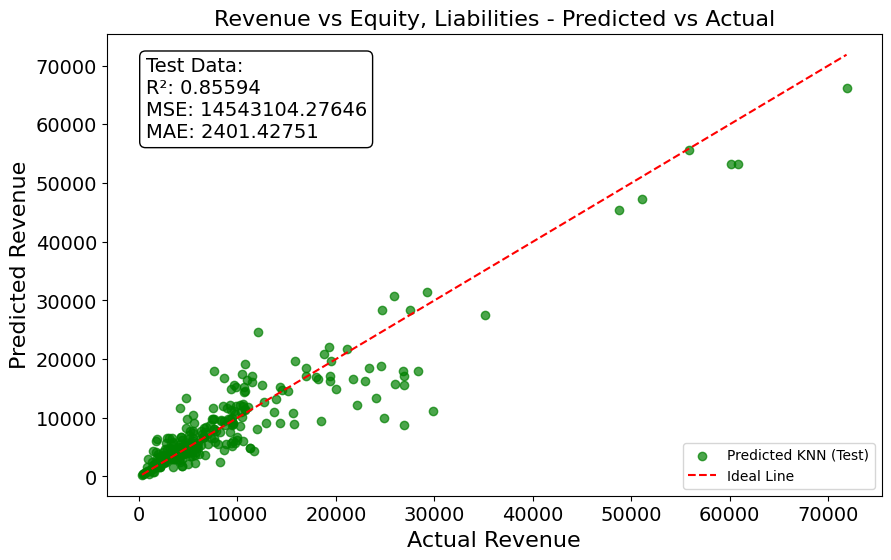

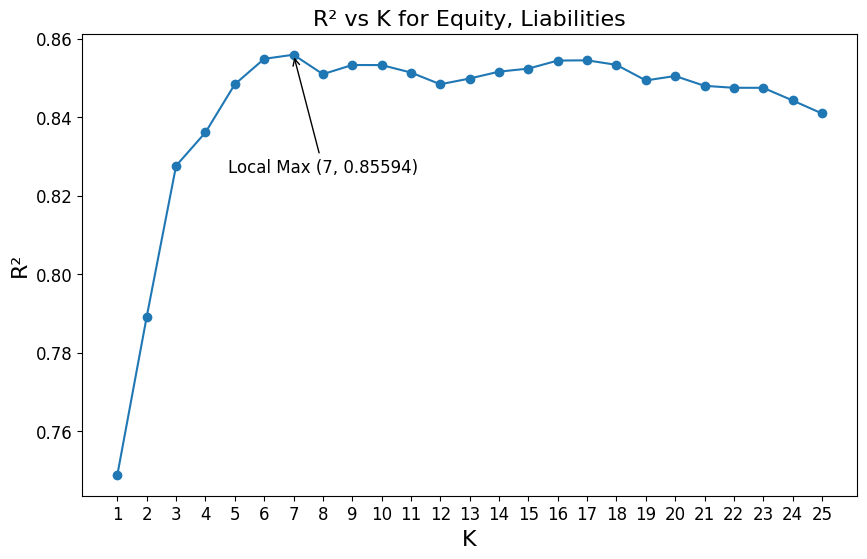

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

target = 'Revenue'
features = ['Equity', 'Liabilities']

# Function to prepare data and calculate KNN performance
def calculate_knn_performance(data, features, target, k):
    X = data[features]
    y = data[target]

    # Split dataset into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize KNN model
    knn = KNeighborsRegressor(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Predict on test set
    y_pred = knn.predict(X_test)

    # Predict on training set for scatter plot
    y_pred_train = knn.predict(X_train)

    # Calculate evaluation metrics for test data
    r2_test = r2_score(y_test, y_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    mae_test = mean_absolute_error(y_test, y_pred)

    # Calculate evaluation metrics for train data
    r2_train = r2_score(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)

    return X_train, y_train, X_test, y_test, y_pred_train, y_pred, r2_train, mse_train, mae_train, r2_test, mse_test, mae_test

# Function to plot Predicted vs Actual with evaluation metrics for both train and test data
def plot_predicted_vs_actual(X_train, y_train, X_test, y_test, y_pred_train, y_pred, title, r2_train, mse_train, mae_train, r2_test, mse_test, mae_test):
    # Plot for test data
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='green', alpha=0.7, label='Predicted KNN (Test)')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line')
    plt.xlabel('Actual Revenue', fontsize=16)
    plt.ylabel('Predicted Revenue', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(loc='lower right')

    # Add evaluation metrics description for test data
    plt.text(0.05, 0.95, f'Test Data:\nR²: {r2_test:.5f}\nMSE: {mse_test:.5f}\nMAE: {mae_test:.5f}',
             transform=plt.gca().transAxes, fontsize=14, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
    plt.show()

# Function to plot R-squared vs K
def plot_r2_vs_k(data, features, target):
    X = data[features]
    y = data[target]

    # Split dataset into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    k_values = range(1, 26)
    r2_values = []

    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_values.append(r2)

    # Find local maxima
    max_r2 = max(r2_values)
    max_index = r2_values.index(max_r2)
    optimal_k = k_values[max_index]

    # Plot R-squared vs K
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, r2_values, marker='o', linestyle='-')
    plt.title(f'R² vs K for {", ".join(features)}', fontsize=16)
    plt.xlabel('K', fontsize=16)
    plt.ylabel('R²', fontsize=16)
    plt.xticks(np.arange(1, 26, step=1), fontsize=12)
    plt.yticks(fontsize=12)

    plt.annotate(f'Local Max ({optimal_k}, {max_r2:.5f})', xy=(optimal_k, max_r2), xytext=(optimal_k + 1, max_r2 - 0.03),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, ha='center')

    plt.show()

# Call function to calculate KNN performance for Equity and Liabilities
X_train_EL, y_train_EL, X_test_EL, y_test_EL, y_pred_train_EL, y_pred_EL, r2_train_EL, mse_train_EL, mae_train_EL, r2_test_EL, mse_test_EL, mae_test_EL = calculate_knn_performance(data, features, target, 7)

# Plot Predicted vs Actual for Equity and Liabilities
plot_predicted_vs_actual(X_train_EL, y_train_EL, X_test_EL, y_test_EL, y_pred_train_EL, y_pred_EL,
                         f'Revenue vs Equity, Liabilities - Predicted vs Actual', r2_train_EL, mse_train_EL, mae_train_EL,
                         r2_test_EL, mse_test_EL, mae_test_EL)

# Plot R-squared vs K for Equity and Liabilities
plot_r2_vs_k(data, features, target)

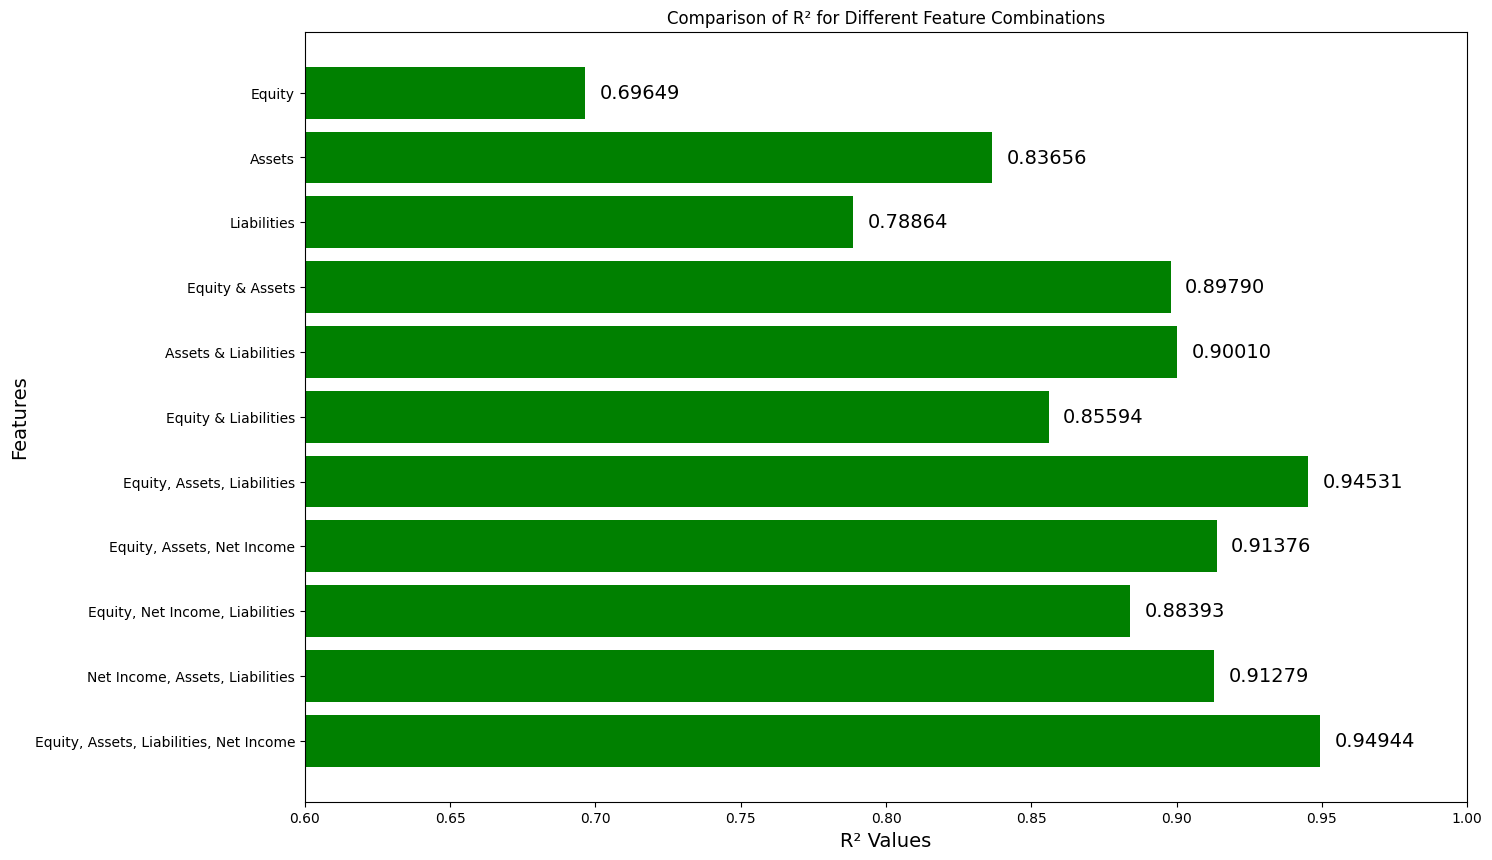

In [ ]:
import matplotlib.pyplot as plt

# Data R-squared (data test) dari masing-masing fitur
features = ['Equity', 'Assets', 'Liabilities', 'Equity & Assets', 'Assets & Liabilities', 'Equity & Liabilities', 'Equity, Assets, Liabilities', 'Equity, Assets, Net Income', 'Equity, Net Income, Liabilities', 'Net Income, Assets, Liabilities', 'Equity, Assets, Liabilities, Net Income']
r2_values = [0.69649, 0.83656, 0.78864, 0.89790, 0.90010, 0.85594, 0.94531, 0.91376, 0.88393, 0.91279, 0.94944]

# Plotting horizontal bar chart
plt.figure(figsize=(15, 10))
bars = plt.barh(features, r2_values, color='green', alpha=0.7)
plt.ylabel('Features', fontsize=14)
plt.xlabel('R² Values', fontsize=14)
plt.title('Comparison of R² for Different Feature Combinations')
plt.xlim(0.6, 1.0)  # Adjust the x-axis limits if needed

# Adding text labels to the right of each bar
for bar, r2_value in zip(bars, r2_values):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2, f'{r2_value:.5f}', ha='left', va='center', fontsize=14)

plt.gca().invert_yaxis()  # Invert the y-axis to have the highest values at the top
plt.show()


## 3 prediktor

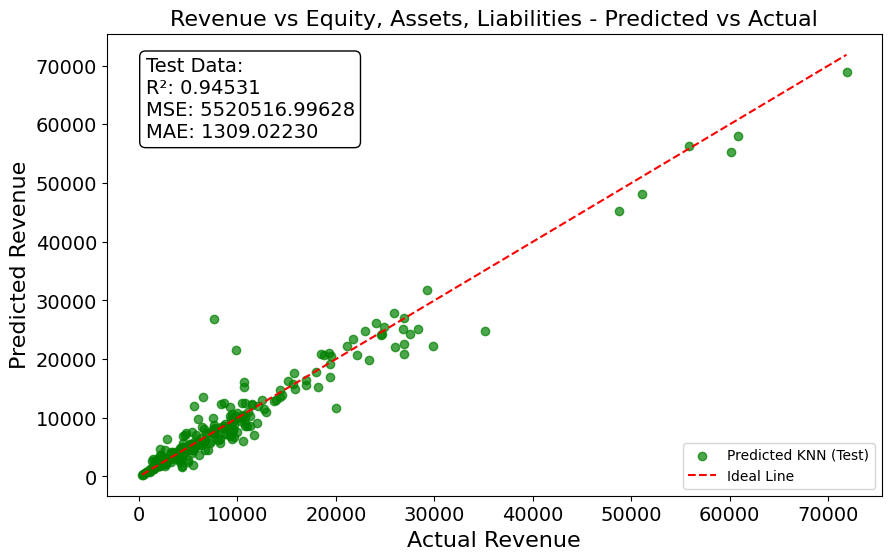

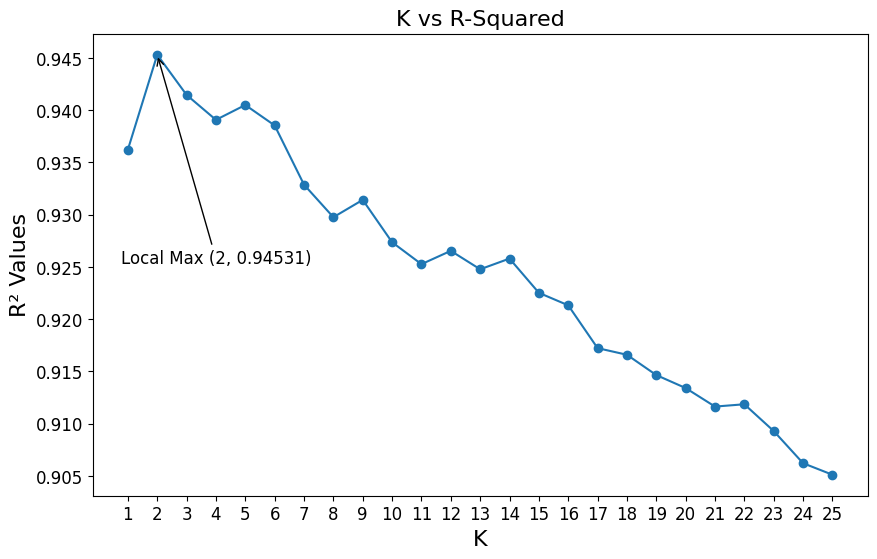

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

target = 'Revenue'
features = ['Equity', 'Assets', 'Liabilities']

# Function to prepare data and calculate KNN performance
def calculate_knn_performance(data, features, target, k):
    X = data[features]
    y = data[target]

    # Split dataset into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize KNN model
    knn = KNeighborsRegressor(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Predict on test set
    y_pred = knn.predict(X_test)

    # Predict on training set for scatter plot
    y_pred_train = knn.predict(X_train)

    # Calculate evaluation metrics for test data
    r2_test = r2_score(y_test, y_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    mae_test = mean_absolute_error(y_test, y_pred)

    # Calculate evaluation metrics for train data
    r2_train = r2_score(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)

    return X_train, y_train, X_test, y_test, y_pred_train, y_pred, r2_train, mse_train, mae_train, r2_test, mse_test, mae_test

# Function to plot Predicted vs Actual with evaluation metrics for both train and test data
def plot_predicted_vs_actual(X_train, y_train, X_test, y_test, y_pred_train, y_pred, title, r2_train, mse_train, mae_train, r2_test, mse_test, mae_test):
    # Plot for test data
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='green', alpha=0.7, label='Predicted KNN (Test)')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line')
    plt.xlabel('Actual Revenue', fontsize=16)
    plt.ylabel('Predicted Revenue', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(loc='lower right')

    # Add evaluation metrics description for test data
    plt.text(0.05, 0.95, f'Test Data:\nR²: {r2_test:.5f}\nMSE: {mse_test:.5f}\nMAE: {mae_test:.5f}',
             transform=plt.gca().transAxes, fontsize=14, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
    plt.show()

# Function to plot R-squared vs K
def plot_r2_vs_k(data, features, target):
    X = data[features]
    y = data[target]

    # Split dataset into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    k_values = range(1, 26)
    r2_values = []

    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_values.append(r2)

    # Find local maxima
    max_r2 = max(r2_values)
    max_index = r2_values.index(max_r2)
    optimal_k = k_values[max_index]

    # Plot R-squared vs K
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, r2_values, marker='o', linestyle='-')
    plt.title(f'K vs R-Squared', fontsize=16)
    plt.xlabel('K', fontsize=16)
    plt.ylabel('R² Values', fontsize=16)
    plt.xticks(np.arange(1, 26, step=1), fontsize=12)
    plt.yticks(fontsize=12)

    plt.annotate(f'Local Max ({optimal_k}, {max_r2:.5f})', xy=(optimal_k, max_r2), xytext=(optimal_k + 2, max_r2 - 0.02),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, ha='center')

    plt.show()

# Call function to calculate KNN performance for Equity, Assets, and Liabilities
X_train_EAL, y_train_EAL, X_test_EAL, y_test_EAL, y_pred_train_EAL, y_pred_EAL, r2_train_EAL, mse_train_EAL, mae_train_EAL, r2_test_EAL, mse_test_EAL, mae_test_EAL = calculate_knn_performance(data, features, target, 2)

# Plot Predicted vs Actual for Equity, Assets, and Liabilities
plot_predicted_vs_actual(X_train_EAL, y_train_EAL, X_test_EAL, y_test_EAL, y_pred_train_EAL, y_pred_EAL,
                         f'Revenue vs Equity, Assets, Liabilities - Predicted vs Actual', r2_train_EAL, mse_train_EAL, mae_train_EAL,
                         r2_test_EAL, mse_test_EAL, mae_test_EAL)

# Plot R-squared vs K for Equity, Assets, and Liabilities
plot_r2_vs_k(data, features, target)


## R2 multiple regression

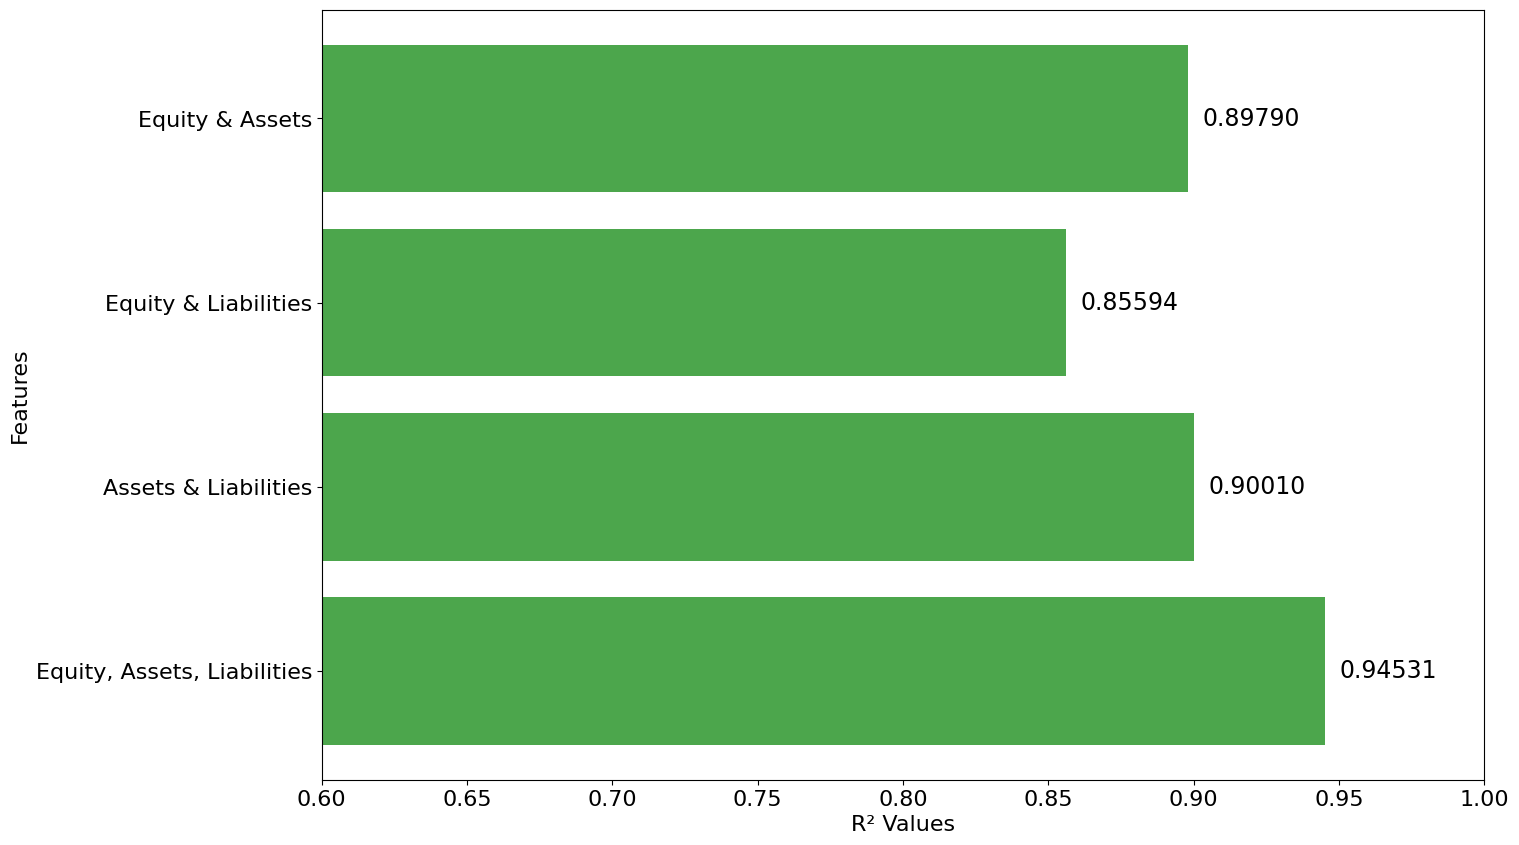

In [ ]:
import matplotlib.pyplot as plt

# Data R-squared (data test) dari masing-masing fitur
features = ['Equity & Assets', 'Equity & Liabilities', 'Assets & Liabilities',
            'Equity, Assets, Liabilities']
r2_values = [0.89790, 0.85594, 0.90010, 0.94531]

# Plotting horizontal bar chart
plt.figure(figsize=(15, 10))
bars = plt.barh(features, r2_values, color='green', alpha=0.7)
plt.ylabel('Features', fontsize=16)
plt.xlabel('R² Values', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0.6, 1.0)  # Adjust the x-axis limits if needed

# Adding text labels to the right of each bar
for bar, r2_value in zip(bars, r2_values):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2, f'{r2_value:.5f}', ha='left', va='center', fontsize=17)

plt.gca().invert_yaxis()  # Invert the y-axis to have the highest values at the top
plt.show()


## R2 all feature combinations

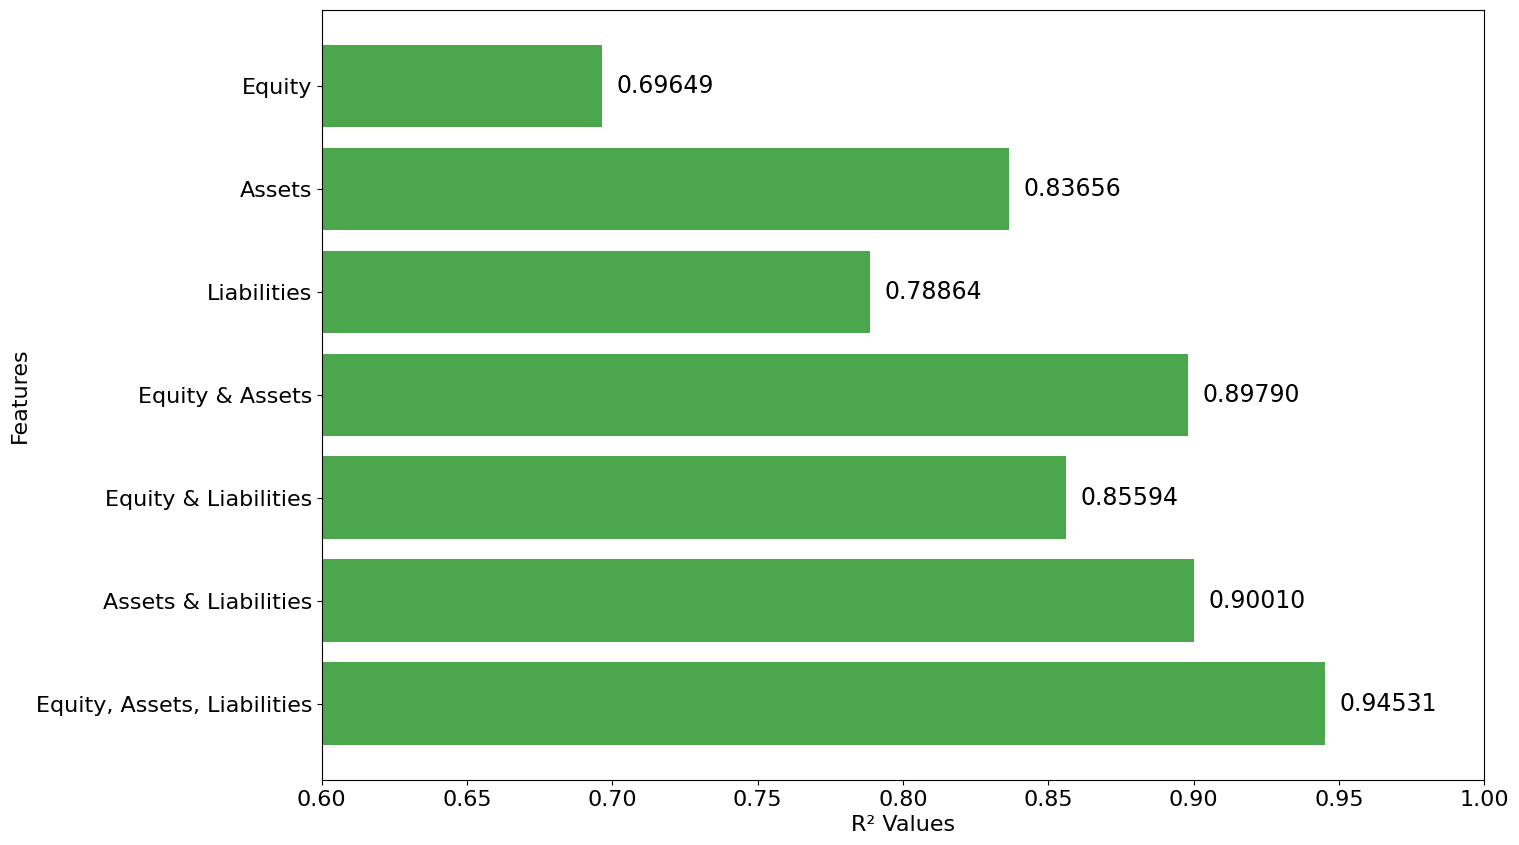

In [ ]:
import matplotlib.pyplot as plt

# Data R-squared (data test) dari masing-masing fitur
features = ['Equity', 'Assets', 'Liabilities',
            'Equity & Assets', 'Equity & Liabilities', 'Assets & Liabilities',
            'Equity, Assets, Liabilities']
r2_values = [0.69649, 0.83656, 0.78864, 0.89790, 0.85594, 0.90010, 0.94531]

# Plotting horizontal bar chart
plt.figure(figsize=(15, 10))
bars = plt.barh(features, r2_values, color='green', alpha=0.7)
plt.ylabel('Features', fontsize=16)
plt.xlabel('R² Values', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0.6, 1.0)  # Adjust the x-axis limits if needed

# Adding text labels to the right of each bar
for bar, r2_value in zip(bars, r2_values):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2, f'{r2_value:.5f}', ha='left', va='center', fontsize=17)

plt.gca().invert_yaxis()  # Invert the y-axis to have the highest values at the top
plt.show()



## R2 LR & KNN comparison

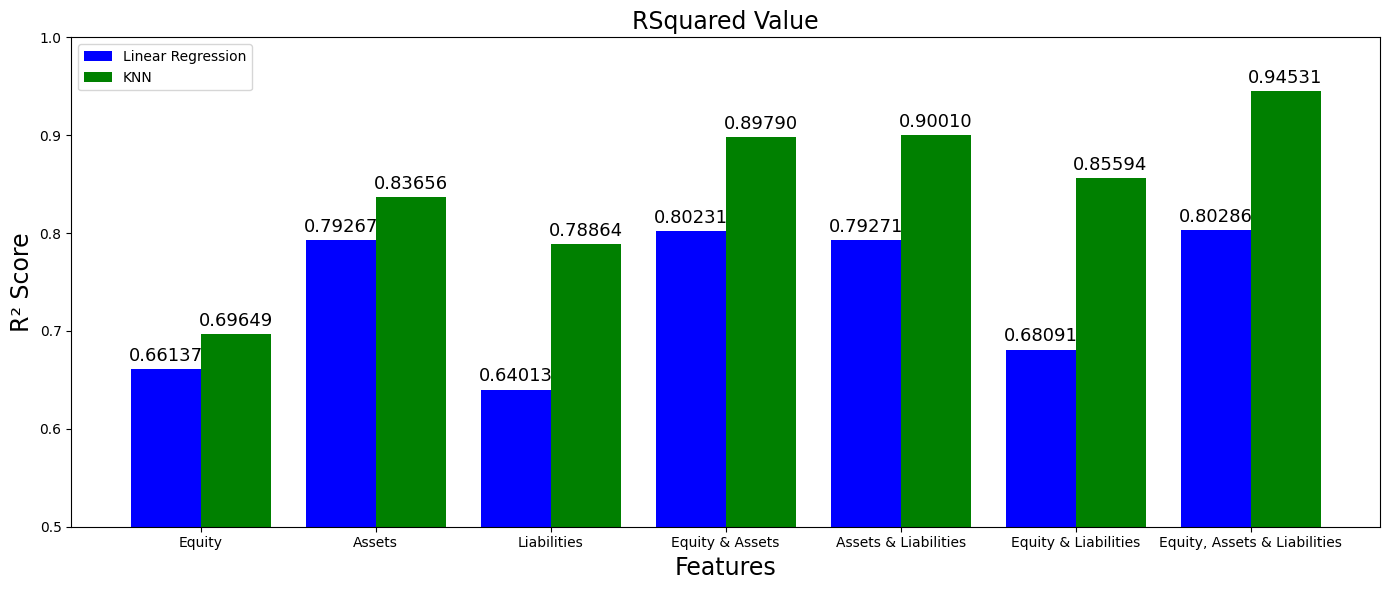

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# R² values for Linear Regression
lr_r2_values = {
    'Equity': 0.66137,
    'Assets': 0.79267,
    'Liabilities': 0.64013,
    'Equity & Assets': 0.80231,
    'Assets & Liabilities': 0.79271,
    'Equity & Liabilities': 0.68091,
    'Equity, Assets & Liabilities': 0.80286,
}

# R² values for KNN
knn_r2_values = {
    'Equity': 0.69649,
    'Assets': 0.83656,
    'Liabilities': 0.78864,
    'Equity & Assets': 0.89790,
    'Assets & Liabilities': 0.90010,
    'Equity & Liabilities': 0.85594,
    'Equity, Assets & Liabilities': 0.94531,
}

# Creating a DataFrame for easier plotting
features = list(lr_r2_values.keys())
lr_r2 = list(lr_r2_values.values())
knn_r2 = list(knn_r2_values.values())

x = np.arange(len(features))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - width/2, lr_r2, width, label='Linear Regression', color='b', align='center')
bars2 = ax.bar(x + width/2, knn_r2, width, label='KNN', color='g', align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Features', fontsize=17)
ax.set_ylabel('R² Score', fontsize=17)
ax.set_title('RSquared Value', fontsize=17)
ax.set_xticks(x)
ax.set_xticklabels(features)
ax.legend(loc='upper left')

# Adding R² values on top of the bars
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.5f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=13)

add_values(bars1)
add_values(bars2)

fig.tight_layout()
plt.ylim(0.5, 1.0)
plt.show()
